# Pymaceuticals Inc.
---

### Analysis
#### Objective
- The purpose of this study was to compare the performance of Pymaceuticals’ drug of interest, Capomulin, against the other treatment regimens, based on analysis.
#### What we have
- Total of 248 mouse used for tests. Gender distribution of mouses almost same, 51% male, 49% female
- Total of 10 drug regimen is used for treatment over those 248 mouses, over the course of 45 days to each mouse.
#### Findings
- Capomulin and Ramicane are more effective reducing the size of tumors.
- Capomulin is the right decision as Pymaceuticals’ drug of interest.
- Tumor volume increasing as mouse weight increases. There is a positive corrolation at scatter plot. - Relation between Tumor volume mm3 (y), and Mouse weight g (x) is: y=095x+21.55, so tumor volume can be predicted based on a given mouse weight.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

import numpy as np
from scipy.stats import linregress


### Read Study Files 'mouse_metadata' and 'study_results'

In [2]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
# Read the mouse data 
mouse_metadata = pd.read_csv(mouse_metadata_path)

study_results_path = "data/Study_results.csv"
# Read the study data 
study_results = pd.read_csv(study_results_path)

# Display two data table for preview
display(mouse_metadata.head())   # display() works to show multiple outputs
display(study_results.head())    # display() works to show multiple outputs

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


### Combine two files above

In [3]:
# Combine the above data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, how='outer', on="Mouse ID")
# Display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


### Mouse Count

In [4]:
# Checking the number of mice.
mice_count = combined_data["Mouse ID"].nunique()
mice_count

249

### Check Duplicates

In [5]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mice_ID_duplicated = combined_data.loc[combined_data.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
mice_ID_duplicated

array(['g989'], dtype=object)

In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
all_mice_ID_duplicated = combined_data.loc[combined_data["Mouse ID"] == "g989", :]
all_mice_ID_duplicated

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


### Removing Duplicated 'Mouse ID'

In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

# clean_data = combined_data[combined_data['Mouse ID'].isin(all_mice_ID_duplicated)==False]
# Actually I could not be able to remove/drop given data, instead
# re-collect same data if Mouse ID is not the duplicated one.

clean_data = combined_data.loc[combined_data["Mouse ID"] != "g989", :]

clean_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


### Mouse Count - Corrected

In [8]:
### Mouse Count# Checking the number of mice in the clean DataFrame.
clean_mouse_count = clean_data["Mouse ID"].nunique()
clean_mouse_count

# After this point, [clean_data] data frame to be used for Summary Statistics

248

## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mean   = clean_data['Tumor Volume (mm3)'].groupby(clean_data['Drug Regimen']).mean()
median = clean_data['Tumor Volume (mm3)'].groupby(clean_data['Drug Regimen']).median()
var    = clean_data['Tumor Volume (mm3)'].groupby(clean_data['Drug Regimen']).var()
std    = clean_data['Tumor Volume (mm3)'].groupby(clean_data['Drug Regimen']).std()
sem    = clean_data['Tumor Volume (mm3)'].groupby(clean_data['Drug Regimen']).sem()

# Assemble the resulting series into a single summary DataFrame.
summary_stat = pd.DataFrame({"Tumor Volume - (Mean)":      mean, 
                             "Tumor Volume - (Median)":    median, 
                             "Tumor Volume - (Variance)":  var, 
                             "Tumor Volume - (Std.Dev.)": std, 
                             "Tumor Volume - (Std.Err.)": sem})

# Display the Summary statistics table grouped by 'Drug Regimen' column
summary_stat

,Tumor Volume - (Mean),Tumor Volume - (Median),Tumor Volume - (Variance),Tumor Volume - (Std.Dev.),Tumor Volume - (Std.Err.)
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_agg =  clean_data.groupby(['Drug Regimen'])[['Tumor Volume (mm3)']].agg(['mean', 'median', 'var', 'std', 'sem'])
summary_agg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

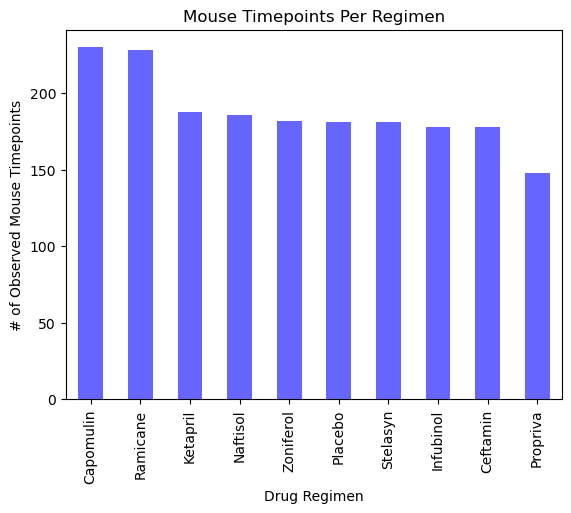

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

# Create an array Drug Regimen and mouse counts
mouse_timepoints = clean_data["Drug Regimen"].value_counts()
# display(mouse_timepoints) # for testing to make sure df is correct

# Create bar graph only, # not stored in another variable because not to be used later on.
mouse_timepoints.plot.bar(color='b', alpha=0.6)  

# Set the xlabel, ylabel, and title using class methods
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.title("Mouse Timepoints Per Regimen")

plt.show()

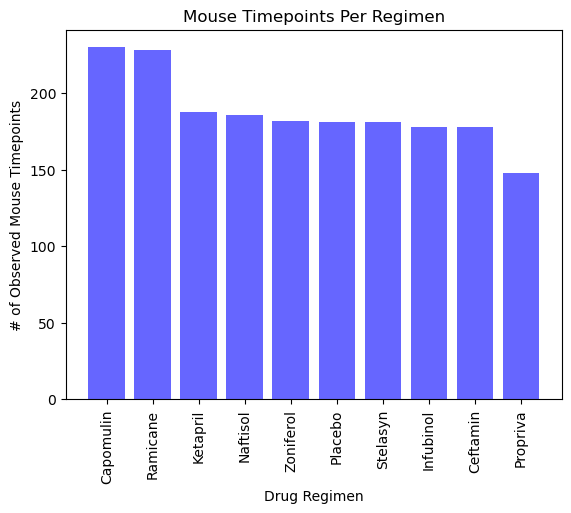

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
# x, y values
x_values = mouse_timepoints.index.values
y_values = mouse_timepoints.values

# Create a Pyplot bar plot based off of the group series from before and label the title
plt.bar(x_values, y_values, color='b', alpha=0.6, align='center')

# Set the xlabel and ylabel, 
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xticks(rotation=90)

# title 
plt.title("Mouse Timepoints Per Regimen")

plt.show()

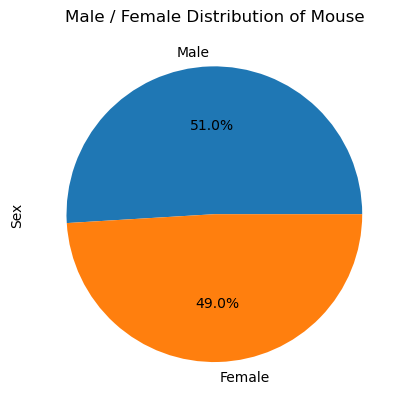

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# counts
male_female = clean_data["Sex"].value_counts()
# create pie chart
male_female.plot(kind='pie', y='Sex', autopct='%1.1f%%', title='Male / Female Distribution of Mouse', ylabel='Sex')

plt.show()

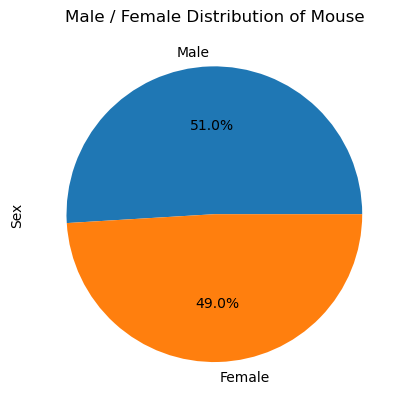

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# counts
values = clean_data["Sex"].value_counts()    # Values to plot
labels = ['Male', 'Female']                  # labels for values
autopercent='%.1f%%'                         # Auto percentage calculation and format

# Create plot
plt.pie(values, labels=labels, autopct=autopercent )

# x, y axis labels
plt.ylabel("Sex")
plt.title("Male / Female Distribution of Mouse")

# Display pie plot
plt.show()

## Quartiles, Outliers and Boxplots

In [15]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
regimen_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
drug_data = clean_data[clean_data["Drug Regimen"].isin(regimen_list)]
drug_data.head()

# drug_data.to_csv("data/drug_data.csv")            # to have a look to file, one time only

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [16]:
# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = drug_data.groupby(["Drug Regimen", "Mouse ID"]).agg(tumor_size=("Tumor Volume (mm3)", lambda x: x.iloc[-1]))
# Reshape dataframe
last_timepoint = last_timepoint.stack(level=0).unstack(level=0)
for d in regimen_list:
    print(d)                                      # to have a look if correct data extracted

# last_timepoint.to_csv("data/last_timepoint.csv")  # to have a look to file one time only

Capomulin
Ramicane
Infubinol
Ceftamin


In [24]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list=[]
for d in regimen_list:
    treatment_list.append(d)

# Create empty list to fill with tumor vol data (for plotting)
boxplot_list = []


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    # Locate the rows which contain mice on each drug and get the tumor volumes

    # add subset 

    # Determine outliers using upper and lower bounds

for drug in regimen_list:
    quartiles = last_timepoint[drug].quantile([.25,.5,.75]).round(2)
    lowerq = quartiles[0.25].round(2)
    upperq = quartiles[0.75].round(2)

    iqr = round(upperq-lowerq,2)
 
    lower_bound = round(lowerq - (1.5*iqr),2)
    upper_bound = round(upperq + (1.5*iqr),2)

    print(f"-------------------------------------------------------------------------------------------")
    print(f"The lower quartile of {drug} treatments is:      {lowerq}")
    print(f"The upper quartile of {drug} treatments is:      {upperq}")
    print(f"The interquartile range of {drug} treatments is: {iqr}")
    print(f"")
    print(f"Values below {lower_bound} could be {drug} outliers.")
    print(f"Values above {upper_bound} could be {drug} outliers.")
    print(f"")
    pot_outliers = []
    pot_outliers = drug_data.loc[(  (drug_data["Tumor Volume (mm3)"] < lower_bound) 
                                   | (drug_data["Tumor Volume (mm3)"] > upper_bound)
                                  ) 
                                   & (drug_data["Drug Regimen"] == drug)
                                 ]
    
    pot_outliers = pot_outliers ["Tumor Volume (mm3)"] 
    print(f"{drug}'s potential outliers: {pot_outliers}")

-------------------------------------------------------------------------------------------
The lower quartile of Capomulin treatments is:      32.38
The upper quartile of Capomulin treatments is:      40.16
The interquartile range of Capomulin treatments is: 7.78

Values below 20.71 could be Capomulin outliers.
Values above 51.83 could be Capomulin outliers.

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
-------------------------------------------------------------------------------------------
The lower quartile of Ramicane treatments is:      31.56
The upper quartile of Ramicane treatments is:      40.66
The interquartile range of Ramicane treatments is: 9.1

Values below 17.91 could be Ramicane outliers.
Values above 54.31 could be Ramicane outliers.

Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
-------------------------------------------------------------------------------------------
The lower quartile 

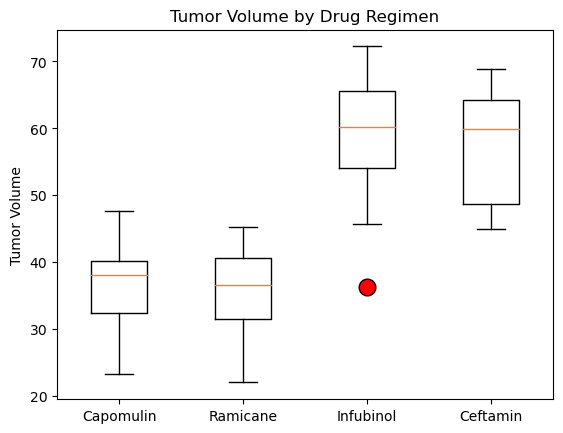

In [18]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
boxplot_list = []
for drug in regimen_list:
    boxplot_list.append(list(last_timepoint[drug].dropna()))
  
treatment_list=[]
for d in regimen_list:
    treatment_list.append(d)   
 
# plot. Set color of outliars/fliers
flierprops = dict(marker='o', markerfacecolor='r', markersize=12,
                  linestyle='none', markeredgecolor='k')
plt.boxplot(boxplot_list, labels=treatment_list, flierprops=flierprops)

# plt.xlabel("Regimen") # It is removed just because solution sheet does not have, we can put if we want.
plt.xticks=(['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
plt.ylabel("Tumor Volume")
plt.title("Tumor Volume by Drug Regimen")

plt.show()     

## Line and Scatter Plots

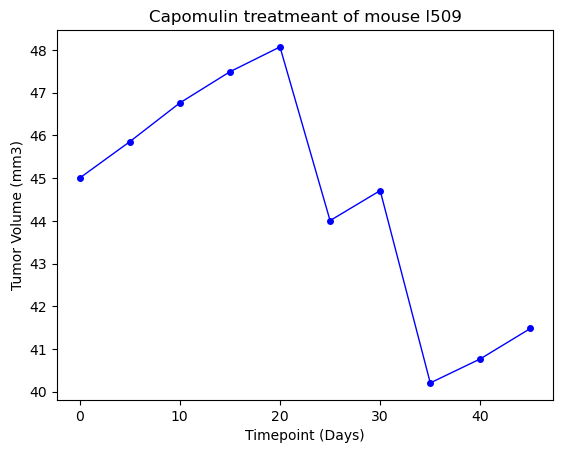

In [19]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

capomulin_data = clean_data.loc[clean_data["Drug Regimen"] == "Capomulin",:]

single_mouse_data = capomulin_data.loc[capomulin_data["Mouse ID"] == "l509",:]
single_mouse_data.head()
x_axis = single_mouse_data["Timepoint"]
tumor_vol = single_mouse_data["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
plt.title('Capomulin treatmeant of mouse l509')
plt.plot(x_axis, tumor_vol, linewidth=1, markersize=4, marker="o", color="blue", label="")
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')

plt.show()  

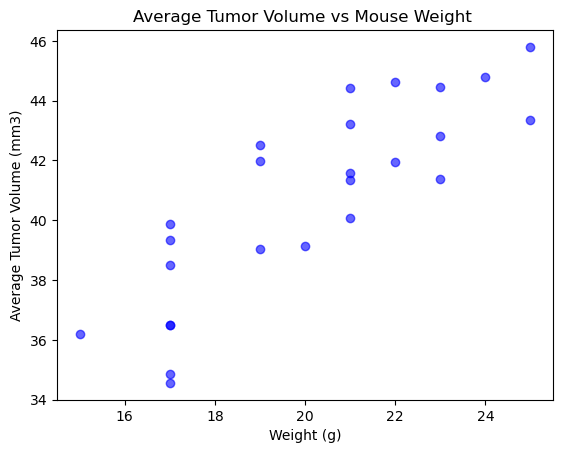

In [20]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
avg_capo_vol = capomulin_data.groupby(['Mouse ID']).mean(numeric_only=True) 
                                      # Python gives error, some values are not numeric in "Mouse ID" column.  
                                      # that is why I put "numeric_only=True" attribute

marker_size=4
plt.scatter(avg_capo_vol['Weight (g)'],avg_capo_vol['Tumor Volume (mm3)'], color="blue", alpha=0.6)
plt.title('Average Tumor Volume vs Mouse Weight ')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.show()  

## Correlation and Regression

In [21]:
# Calculate the correlation coefficient and a linear regression model 

# corrolation value
weight = avg_capo_vol["Weight (g)"]
volume = avg_capo_vol["Tumor Volume (mm3)"]

print(f"The correlation between mouse weight and the average tumor volume is: {round(st.pearsonr(weight,volume)[0],2)}")

The correlation between mouse weight and the average tumor volume is: 0.84


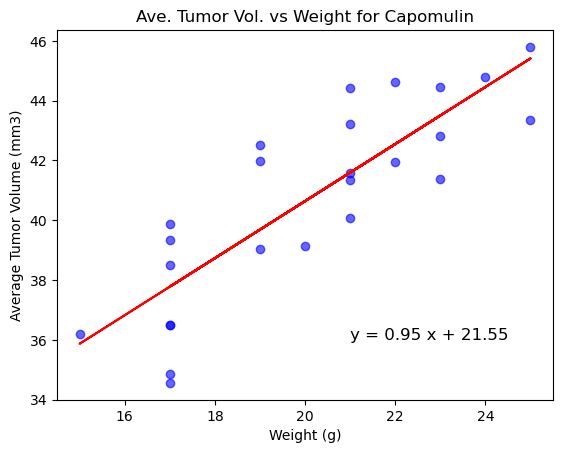

In [22]:
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr)= linregress(avg_capo_vol["Weight (g)"], avg_capo_vol["Tumor Volume (mm3)"])
regress_values=avg_capo_vol["Weight (g)"]* slope + intercept

# scatter plot
plt.scatter(avg_capo_vol["Weight (g)"], avg_capo_vol["Tumor Volume (mm3)"], color='b', alpha=0.6)

# line plot
plt.plot(avg_capo_vol["Weight (g)"], regress_values, color='red')

# Linear equation on graph
linear_eq= f"y = {round(slope, 2)} x + {round(intercept, 2)}"
plt.annotate(linear_eq, (21,36), fontsize=12)

# labels
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

# title
plt.title(f"Ave. Tumor Vol. vs Weight for Capomulin")

# display graph
plt.show()

## Prediction

In [23]:
# Prediction
print(f"Tumor Volume can be predicted for a given mouse weight based on linear equation: {linear_eq}")

Tumor Volume can be predicted for a given mouse weight based on linear equation: y = 0.95 x + 21.55
